In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ECommerce_consumer behaviour.csv')

In [ ]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2015280 entries, 0 to 2019500
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  order_number_lower      float64
 13  order_number_upper      float64
dtypes: float64(3), int64(9), object(2)
memory usage: 230.6+ MB


In [ ]:
data.dtypes

,0
order_id,int64
user_id,int64
order_number,int64
order_dow,int64
order_hour_of_day,int64
days_since_prior_order,float64
product_id,int64
add_to_cart_order,int64
reordered,int64
department_id,int64


In [ ]:
data.head()
data.tail()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce
2019500,458285,128787,42,2,19,3.0,123,4,1,4,produce,packaged vegetables fruits


In [ ]:
data.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [ ]:
data.isna().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,124342
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


In [ ]:
data['days_since_prior_order'] = data['days_since_prior_order'].fillna(-1, axis = 0)

In [ ]:
data.isna().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


kiểm tra Outliers

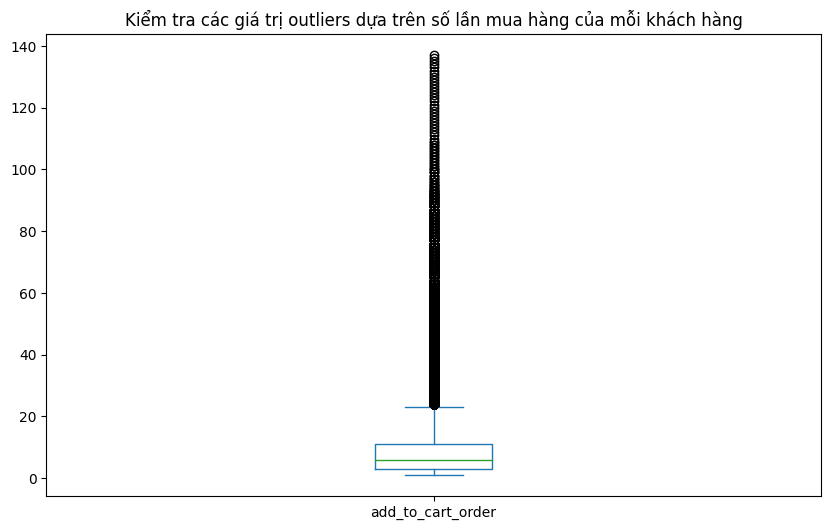

In [ ]:
import matplotlib.pyplot as plt
data['add_to_cart_order'].plot(kind='box', figsize=(10,6))
plt.title('Kiểm tra các giá trị outliers dựa trên số lần mua hàng của mỗi khách hàng')
plt.show()

In [ ]:
means = data.groupby('user_id').mean(numeric_only=True)
Q1 = means['add_to_cart_order'].quantile(0.25)
Q3 = means['add_to_cart_order'].quantile(0.75)
threshold = Q3 + 1.5 * (Q3 - Q1)
outliers_cart = means[means['add_to_cart_order'] > threshold]

In [ ]:
outliers_cart

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
user_id,,,,,,,,,
10,8.339500e+04,4.000000,3.000000,15.000000,14.00000,60.000000,15.500000,0.433333,10.400000
133,2.415920e+05,11.000000,3.000000,13.000000,5.00000,68.133333,15.500000,0.400000,9.033333
197,2.357070e+05,7.000000,6.000000,14.000000,6.00000,74.206897,15.000000,0.793103,11.551724
216,1.500908e+06,5.000000,5.000000,15.000000,24.00000,68.448276,15.000000,0.172414,13.655172
264,3.022479e+06,29.000000,2.000000,9.000000,9.00000,79.551724,15.000000,0.827586,11.103448
...,...,...,...,...,...,...,...,...,...
205789,3.418993e+06,13.000000,6.000000,12.000000,7.00000,63.900000,15.500000,0.600000,9.466667
205926,2.385091e+06,11.000000,1.000000,15.000000,6.00000,73.828571,18.000000,0.514286,10.171429
205956,4.562900e+05,3.000000,3.000000,14.000000,30.00000,69.151515,17.000000,0.303030,10.909091


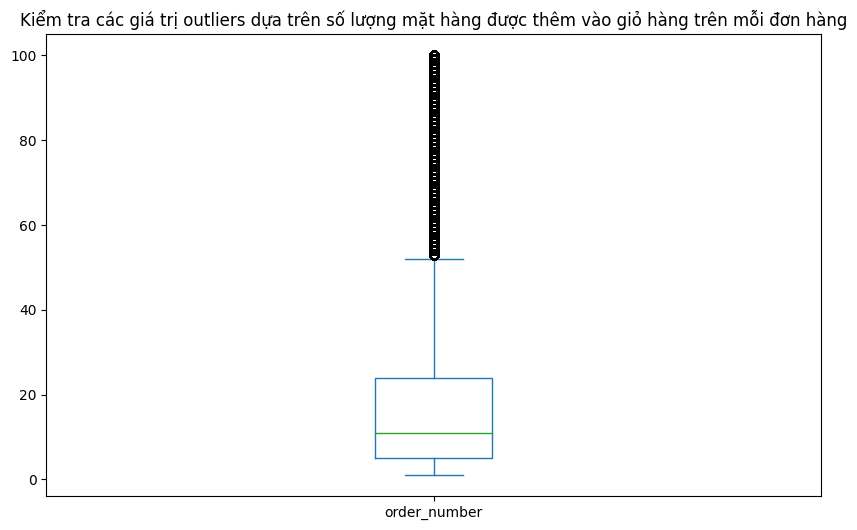

In [ ]:
data['order_number'].plot(kind='box', figsize=(10,6))
plt.title('Kiểm tra các giá trị outliers dựa trên số lượng mặt hàng được thêm vào giỏ hàng trên mỗi đơn hàng')
plt.show()

In [ ]:
orders = data.groupby("user_id")["order_number"].agg(["mean", "std"])
lower = orders['mean'] - 3 * orders['std']
lower.name = 'order_number_lower'
upper = orders["mean"] + 3 * orders["std"]
upper.name = 'order_number_upper'
data = data.join(lower, on='user_id')
data = data.join(upper, on='user_id')

In [ ]:
outliers_orders = data[(data["order_number"] < data['order_number_lower']) | (data["order_number"] > data['order_number_upper'])]

In [ ]:
outliers_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
2538,677735,175561,2,3,12,16.0,32,1,0,4,produce,packaged produce,7.467505,52.722971
8764,2018358,185514,22,4,17,17.0,128,1,0,3,bakery,tortillas flat bread,-5.770319,18.847242
8765,2018358,185514,22,4,17,17.0,54,2,1,17,household,paper goods,-5.770319,18.847242
15536,2545752,185279,9,5,9,12.0,84,1,0,16,dairy eggs,milk,10.001293,28.306399
16290,1365995,136421,1,3,10,-1.0,88,1,0,13,pantry,spreads,1.544766,74.812377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010592,1097536,97028,5,0,16,7.0,24,1,1,4,produce,fresh fruits,-0.146102,4.574673
2010593,1097536,97028,5,0,16,7.0,24,2,0,4,produce,fresh fruits,-0.146102,4.574673
2015806,1581072,93695,5,4,17,30.0,97,1,0,13,pantry,baking supplies decor,3.364384,4.740879
2016905,1373400,139870,11,2,12,30.0,116,1,0,1,frozen,frozen produce,-2.906531,10.137300


<ipython-input-40-aee55cd867c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x='add_to_cart_order', y='product_name', data=data,


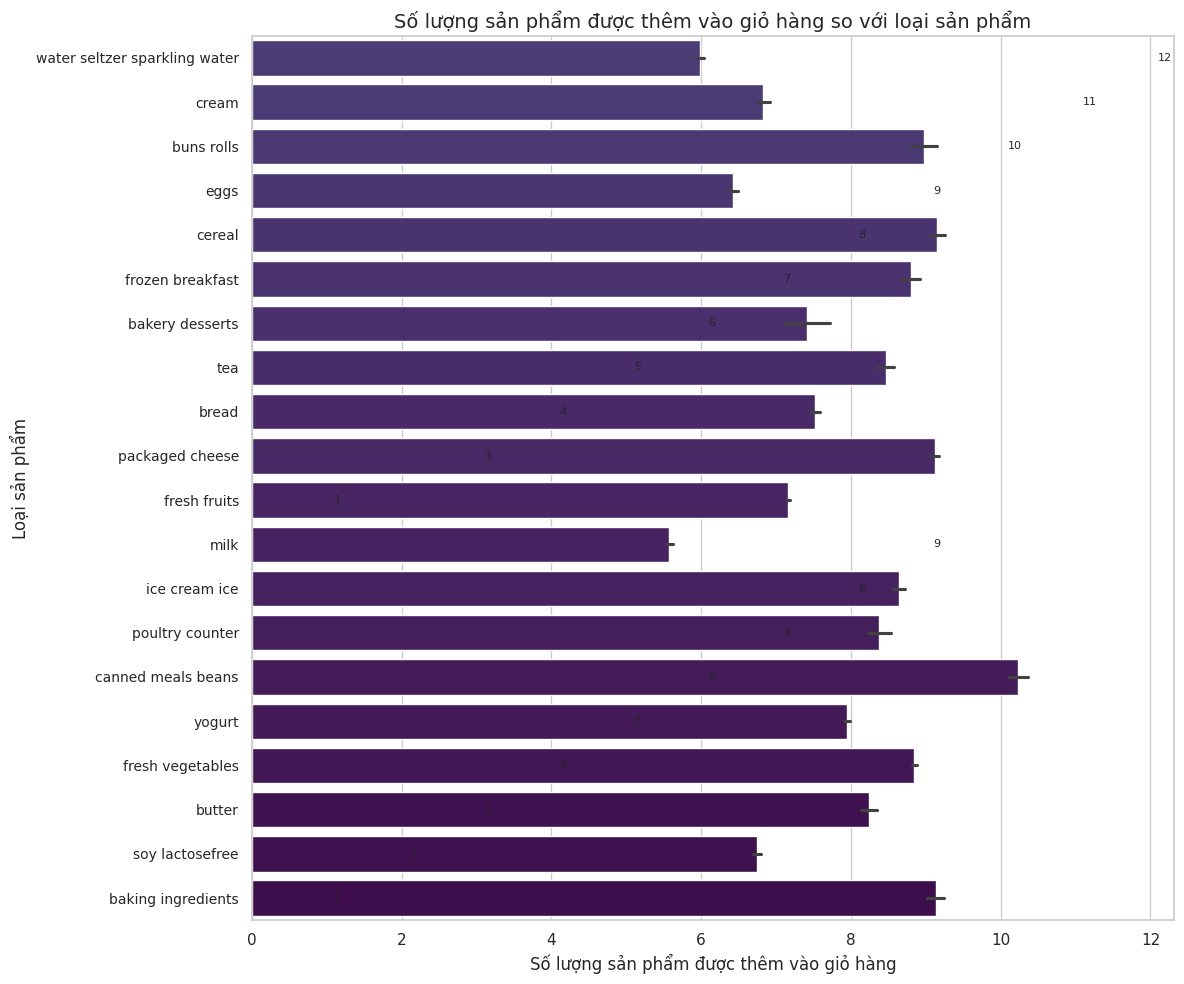

In [ ]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

chart = sns.barplot(x='add_to_cart_order', y='product_name', data=data,
                    palette='viridis', orient='h')

plt.xlabel('Số lượng sản phẩm được thêm vào giỏ hàng', fontsize=12)
plt.ylabel('Loại sản phẩm', fontsize=12)
plt.title('Số lượng sản phẩm được thêm vào giỏ hàng so với loại sản phẩm', fontsize=14)

# Giới hạn số lượng sản phẩm hiển thị
top_n = 20
plt.ylim(-0.5, top_n - 0.5)

# Chỉnh sửa nhãn trục y để dễ đọc hơn
labels = [label.get_text() for label in chart.get_yticklabels()]
plt.yticks(range(top_n), labels[:top_n], fontsize=10)

# Thêm giá trị vào cuối mỗi thanh
for i, v in enumerate(data['add_to_cart_order'][:top_n]):
    chart.text(v + 0.1, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
outliers_orders= outliers_orders.drop([21882, 85422, 88725, 156668], axis=0)
data = data.drop(outliers_cart.index)
data = data.drop(outliers_orders.index)

Khám phá dữ liệu

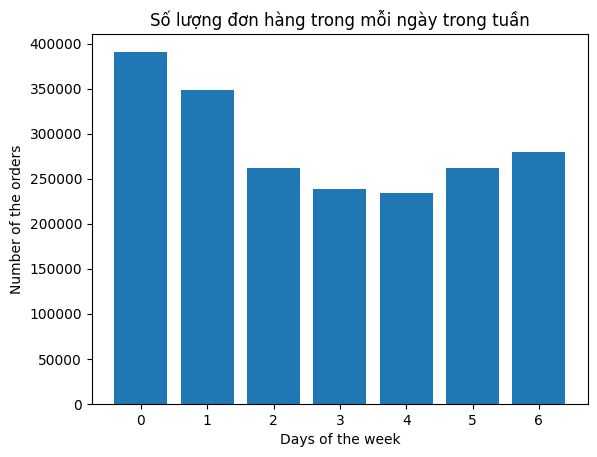

In [ ]:
plt.bar(data.groupby('order_dow').size().index, data.groupby('order_dow').size().values)
plt.title('Số lượng đơn hàng trong mỗi ngày trong tuần')
plt.xlabel('Days of the week')
plt.ylabel('Number of the orders')
plt.show()

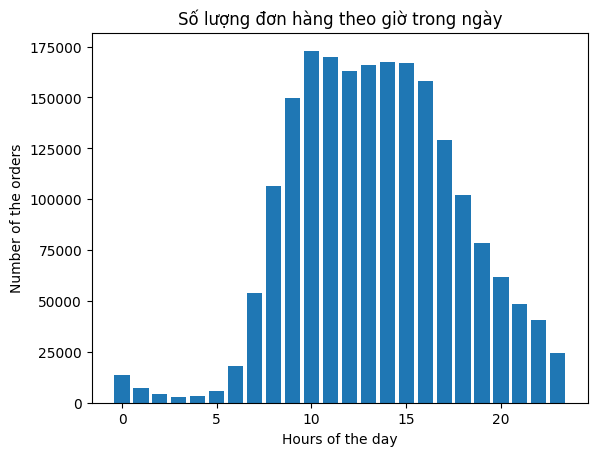

In [ ]:
plt.bar(data.groupby('order_hour_of_day').size().index, data.groupby('order_hour_of_day').size().values)
plt.title('Số lượng đơn hàng theo giờ trong ngày')
plt.xlabel('Hours of the day')
plt.ylabel('Number of the orders')
plt.show()

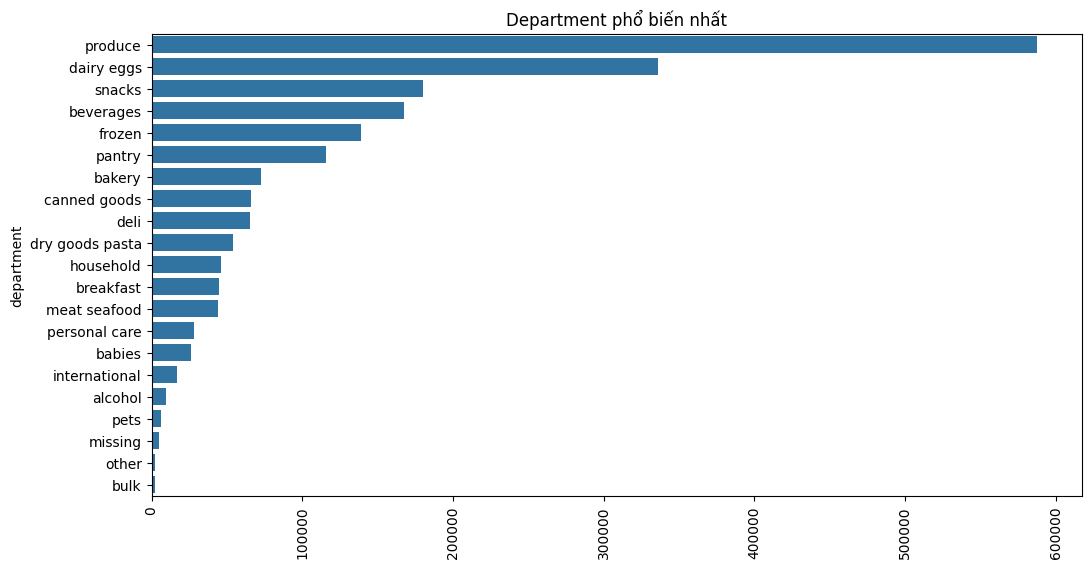

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
counts = data['department'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(y=counts.index, x=counts.values)
plt.title('Department phổ biến nhất')
plt.xticks(rotation=90)
plt.show()

In [ ]:
reorderds = data.groupby('product_name').sum(numeric_only=True)['reordered'].sort_values(ascending=False)

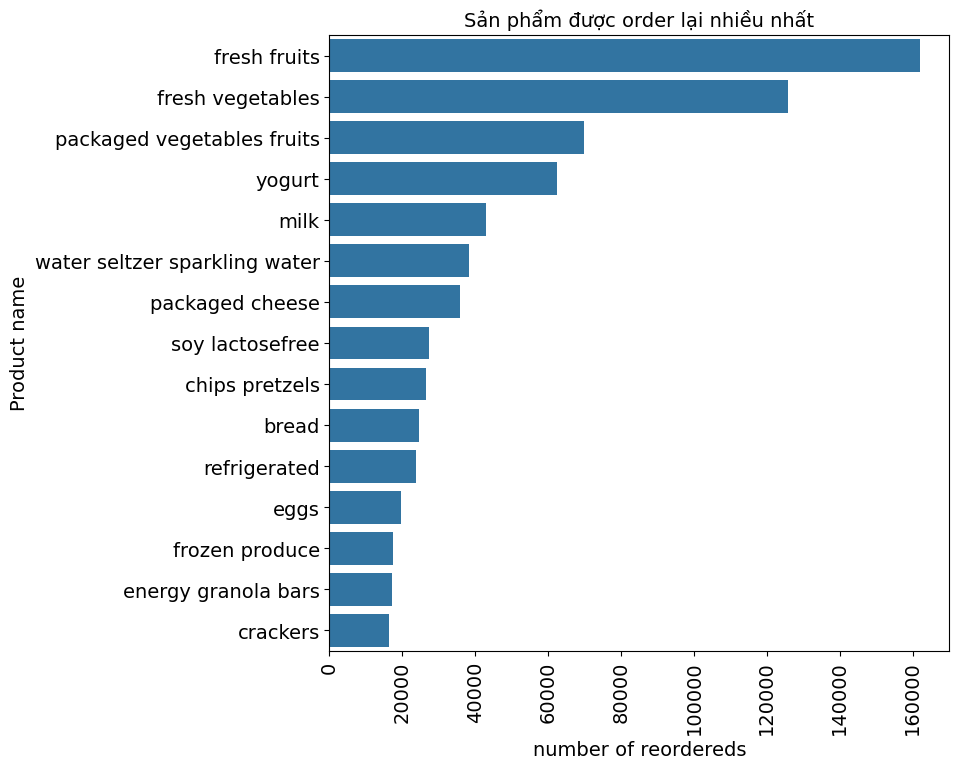

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=reorderds[0:15].values, y=reorderds[0:15].index, orient='h')
plt.title('Sản phẩm được order lại nhiều nhất', fontsize=14)
plt.xticks(rotation=90)
ax.set_xlabel('number of reordereds', fontsize=14)
ax.set_ylabel('Product name', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
plt.show()

In [ ]:
# tìm sản phẩm phổ biến nhất ở mỗi department
product_d = pd.crosstab(data['department'], data['product_name'])
product_d.idxmax(axis=1).to_frame(name="sản phẩm phổ biến nhất")

,sản phẩm phổ biến nhất
department,
alcohol,beers coolers
babies,baby food formula
bakery,bread
beverages,water seltzer sparkling water
breakfast,cereal
bulk,bulk grains rice dried goods
canned goods,soup broth bouillon
dairy eggs,yogurt
deli,lunch meat


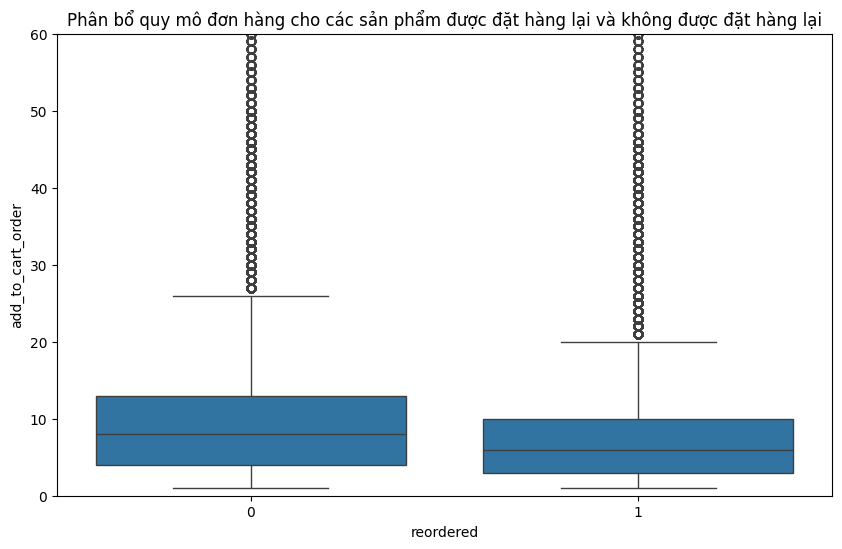

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='reordered', y='add_to_cart_order', data=data)
plt.title('Phân bổ quy mô đơn hàng cho các sản phẩm được đặt hàng lại và không được đặt hàng lại')
plt.ylim(0, 60)
plt.show()

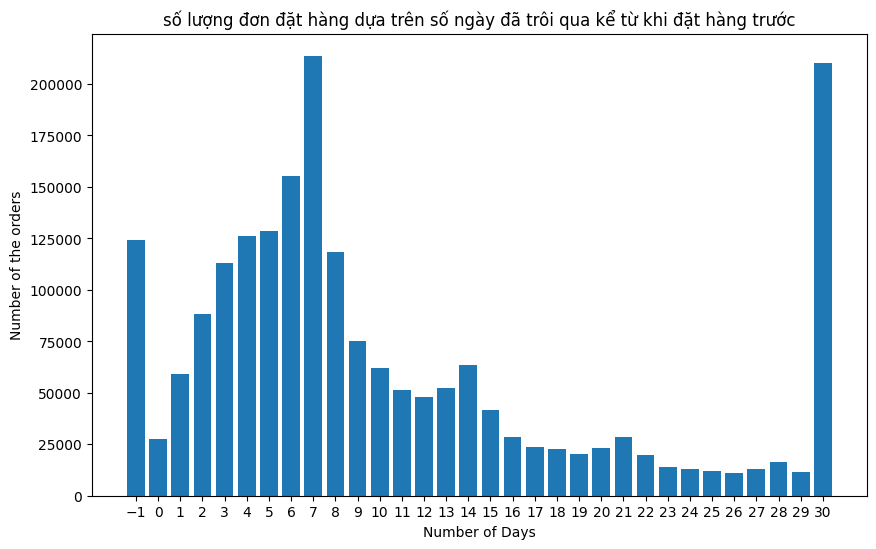

In [ ]:
# tìm mối quan hệ giữa số lượng đơn đặt hàng và số ngày trôi qua kể từ đơn hàng trước đó.
plt.figure(figsize=(10,6))
plt.bar(data.groupby('days_since_prior_order').size().index, data.groupby('days_since_prior_order').size().values)
plt.title('số lượng đơn đặt hàng dựa trên số ngày đã trôi qua kể từ khi đặt hàng trước')
plt.xlabel('Number of Days')
plt.ylabel('Number of the orders')
plt.xticks(range(-1, 31))
plt.show()

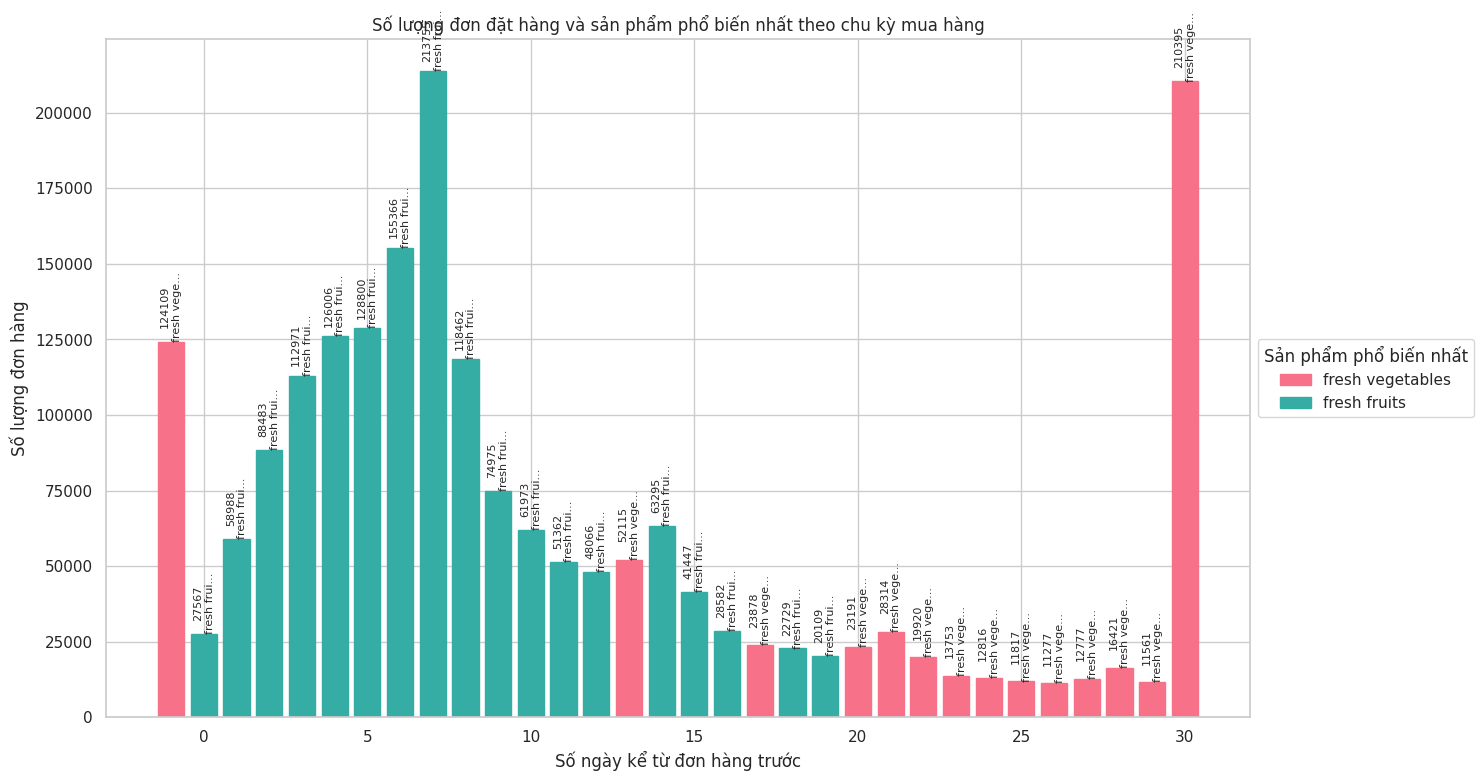

Sản phẩm phổ biến nhất cho chu kỳ 30 ngày: fresh vegetables


In [ ]:
def get_popular_product(group):
    return group['product_name'].value_counts().index[0]

# Đảm bảo 'days_since_prior_order' là kiểu số nguyên
data['days_since_prior_order'] = data['days_since_prior_order'].fillna(-1).astype(int)

# Tính toán sản phẩm phổ biến nhất cho mỗi chu kỳ
popular_products = data.groupby('days_since_prior_order')['product_name'].agg(lambda x: x.value_counts().index[0])

# Đếm số lượng đơn hàng cho mỗi chu kỳ
order_counts = data['days_since_prior_order'].value_counts().sort_index()

# Tạo biểu đồ
plt.figure(figsize=(15, 8))
bars = plt.bar(order_counts.index, order_counts.values)

# Tạo bảng màu cho các sản phẩm
unique_products = popular_products.unique()
color_map = dict(zip(unique_products, sns.color_palette("husl", len(unique_products))))

# Đặt màu cho từng cột dựa trên sản phẩm phổ biến nhất
for i, bar in enumerate(bars):
    product = popular_products.get(order_counts.index[i], 'Unknown')
    bar.set_color(color_map.get(product, 'gray'))

plt.title('Số lượng đơn đặt hàng và sản phẩm phổ biến nhất theo chu kỳ mua hàng')
plt.xlabel('Số ngày kể từ đơn hàng trước')
plt.ylabel('Số lượng đơn hàng')

# Thêm chú thích
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()],
           labels=color_map.keys(), title="Sản phẩm phổ biến nhất",
           loc='center left', bbox_to_anchor=(1, 0.5))

# Thêm nhãn giá trị và tên sản phẩm vào các cột
for i, bar in enumerate(bars):
    height = bar.get_height()
    product = popular_products.get(order_counts.index[i], 'Unknown')
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n{product[:10]}...',
             ha='center', va='bottom', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# In ra sản phẩm phổ biến nhất cho chu kỳ 30 ngày để kiểm tra
print(f"Sản phẩm phổ biến nhất cho chu kỳ 30 ngày: {popular_products.get(30, 'Không có dữ liệu')}")

In [ ]:
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                        order_id   user_id  order_number  order_dow  \
order_id                1.000000  0.000595      0.004744   0.002006   
user_id                 0.000595  1.000000     -0.003219  -0.001794   
order_number            0.004744 -0.003219      1.000000   0.013776   
order_dow               0.002006 -0.001794      0.013776   1.000000   
order_hour_of_day       0.001093 -0.002018     -0.038358   0.010819   
days_since_prior_order -0.001448 -0.000488     -0.256378  -0.027968   
product_id              0.000112  0.000295      0.000231  -0.001425   
add_to_cart_order      -0.003249  0.001184     -0.000299  -0.009235   
reordered               0.002269 -0.001749      0.302919  -0.008723   
department_id           0.000683  0.001450      0.001813   0.003491   
order_number_lower     -0.001720  0.001235     -0.162479  -0.008881   
order_number_upper      0.006179 -0.003773      0.739052   0.017035   

                        order_hour_of_day  days_since_prior_order  product_i

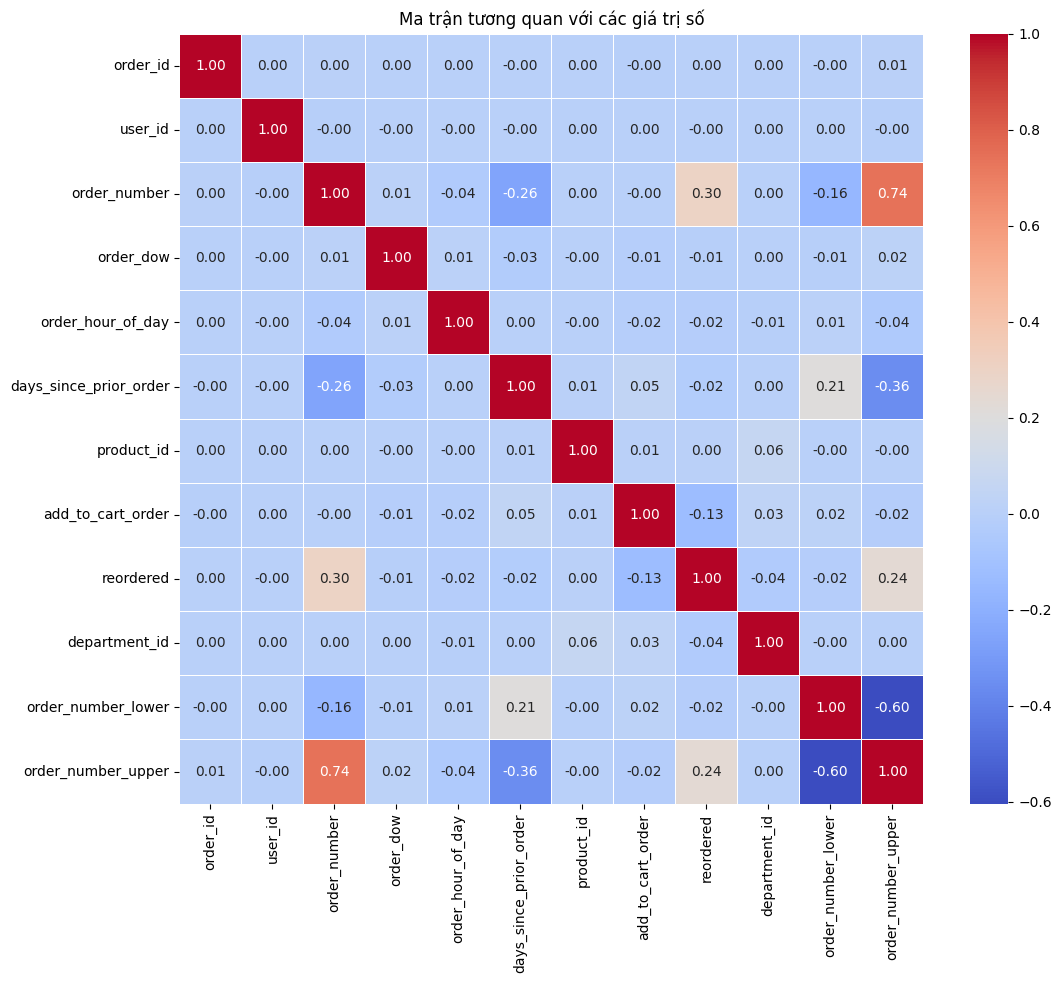

In [ ]:
numeric_data = data.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Ma trận tương quan với các giá trị số")
plt.show()